# Cell Phone Churning

## Library Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = (10, 6) # set default figsize to 10,6
sns.set_style("darkgrid") # sets style for seaborn plots. 

## Data Import and Overview

In [3]:
df = pd.read_csv('./data/churn.csv')
# loads the churn dataset into a pandas dataframe

In [4]:
df.head()
# outputs the first 5 rows of data

,account_length,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.info()
# outputs info about the dataframe, like dtype, non-null count, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   account_length  3333 non-null   int64  
 1   vmail_message   3333 non-null   int64  
 2   day_mins        3333 non-null   float64
 3   day_calls       3333 non-null   int64  
 4   day_charge      3333 non-null   float64
 5   eve_mins        3333 non-null   float64
 6   eve_calls       3333 non-null   int64  
 7   eve_charge      3333 non-null   float64
 8   night_mins      3333 non-null   float64
 9   night_calls     3333 non-null   int64  
 10  night_charge    3333 non-null   float64
 11  intl_mins       3333 non-null   float64
 12  intl_calls      3333 non-null   int64  
 13  intl_charge     3333 non-null   float64
 14  custserv_calls  3333 non-null   int64  
 15  churn           3333 non-null   bool   
dtypes: bool(1), float64(8), int64(7)
memory usage: 394.0 KB


In [6]:
df.describe()
# provides statistical summaries for numerical columns. 

,account_length,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
df.isna().sum()
# sums the number of null values in each column 

account_length    0
vmail_message     0
day_mins          0
day_calls         0
day_charge        0
eve_mins          0
eve_calls         0
eve_charge        0
night_mins        0
night_calls       0
night_charge      0
intl_mins         0
intl_calls        0
intl_charge       0
custserv_calls    0
churn             0
dtype: int64

## Data Cleaning (Outliers)

There are no missing values in this dataset, so we will look for outliers that may be there. However, the purpose of this analysis is to predict if a customer will churn (leave) or not (stay), so outliers may contain important information, so they will remain for the modeling portion of this analysis. 

I will create a copy of the dataframe to do the outlier analysis on so as to not change the original data.

In [8]:
df_copy = df.copy()
# makes a copy of the dataframe separate from the original

In [9]:
df_copy.columns
# list of columns in the dataframe

Index(['account_length', 'vmail_message', 'day_mins', 'day_calls',
       'day_charge', 'eve_mins', 'eve_calls', 'eve_charge', 'night_mins',
       'night_calls', 'night_charge', 'intl_mins', 'intl_calls', 'intl_charge',
       'custserv_calls', 'churn'],
      dtype='object')

In [11]:
day_columns = df_copy.columns[df_copy.columns.str.contains("day")] # contains columns for day
eve_columns = df_copy.columns[df_copy.columns.str.contains("eve")] # contains columns for evening
night_columns = df_copy.columns[df_copy.columns.str.contains("night")] # contains columns for night
intl_columns = df_copy.columns[df_copy.columns.str.contains("intl")] # contains columns for international
misc_columns = df_copy.columns[(~df_copy.columns.str.contains("day")) & (~df_copy.columns.str.contains("eve")) & (~df_copy.columns.str.contains("night")) & (~df_copy.columns.str.contains("intl")) & (~df_copy.columns.str.contains("churn"))] # rest of the columns
# this creates subset column names to separate into different subsets of the data

In [12]:
day = df_copy[day_columns]
eve = df_copy[eve_columns]
night = df_copy[night_columns]
intl = df_copy[intl_columns]
misc = df_copy[misc_columns]
# creates subset dataframes

### Distibution Differences

This section shows the differences in distribution with and without the outliers. The histograms overall to show how they differ. 

In all of the histograms, the overall distribution does not changes, remaining as, for the most part, normally distributed with and without outliers.

I commented out the original plotting, as it took up much space, and was mainly for my benefit. 

In [13]:
def remove_outliers(data, column):
    """
    Creator: Daniel
    Inputs:
        data: dataframe
        column: column_name
    Outputs:
        returns the dataframe, but with the outliers filtered out. 
    """
    Q1 = data[column].quantile(0.25) # 25th percentile 
    Q3 = data[column].quantile(0.75) # 75th percentile
    
    IQR = Q3 - Q1 # Interquartile range
    
    lower_bound = Q1 - (1.5 * IQR) # lower bound. anything below this is an outlier
    upper_bound = Q3 + (1.5 * IQR) # upper bound. anything above this is an outlier

    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)] # filters out the outliers for the column. 

In [14]:
def plot_clean_org(data):
    """
    Creator: Daniel
    Inputs:
        data: subset of the original dataframe
    Outputs:
        This returns 2 histograms, one of the original distribution for each column in the dataframe, 
        and one of the same data, but without the outliers. 
        They overlap to see the difference between them. 
    """
    for col in data.columns:
        temp = remove_outliers(data, col)
        sns.histplot(data=temp, x=col, kde=True, color='red', alpha=0.5, label='Clean')
        sns.histplot(data=data, x=col, kde=True, alpha=0.5, label='Original')
        plt.title(' '.join(col.split("_")).upper())
        plt.legend()
        plt.show()

In [36]:
# plot_clean_org(day)

In [37]:
# plot_clean_org(eve)

In [38]:
# plot_clean_org(night)

In [39]:
# plot_clean_org(intl)

In [40]:
# plot_clean_org(misc)

## README Visualizations

These are the visualizations for my readme. 

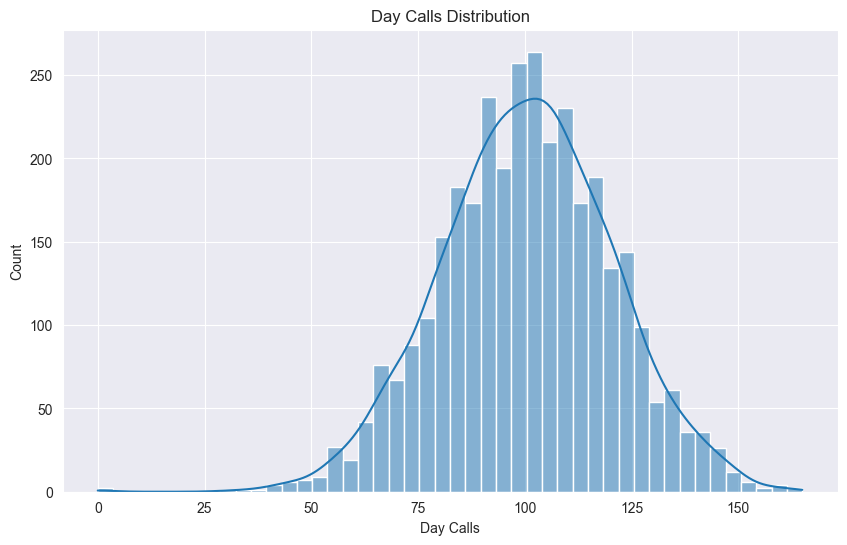

In [20]:
sns.histplot(data=df, x='day_calls', kde=True)
plt.title("Day Calls Distribution")
plt.xlabel("Day Calls")
plt.savefig("./images/day_calls_org.png")
# distribution of the original day calls column

> We can see in this distribution that number of calls range from 0 to 150, with a left skew going towards 0. However, for the most part, it is a normal distribution, noted by its bell shaped curve.

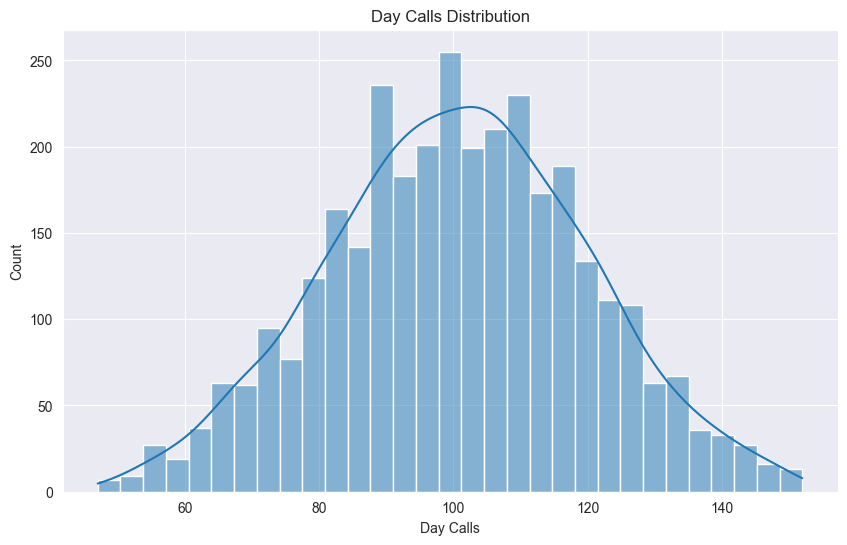

In [21]:
temp = remove_outliers(df, 'day_calls')
sns.histplot(data=temp, x='day_calls', kde=True)
plt.title("Day Calls Distribution")
plt.xlabel("Day Calls")
plt.savefig("./images/day_calls_out.png")
# distribution of day calls column without outliers

> When the outliers are removed, the range goes from around 55 calls to 145 calls, however, it retains its bell-shaped curve. 

#### Account Length

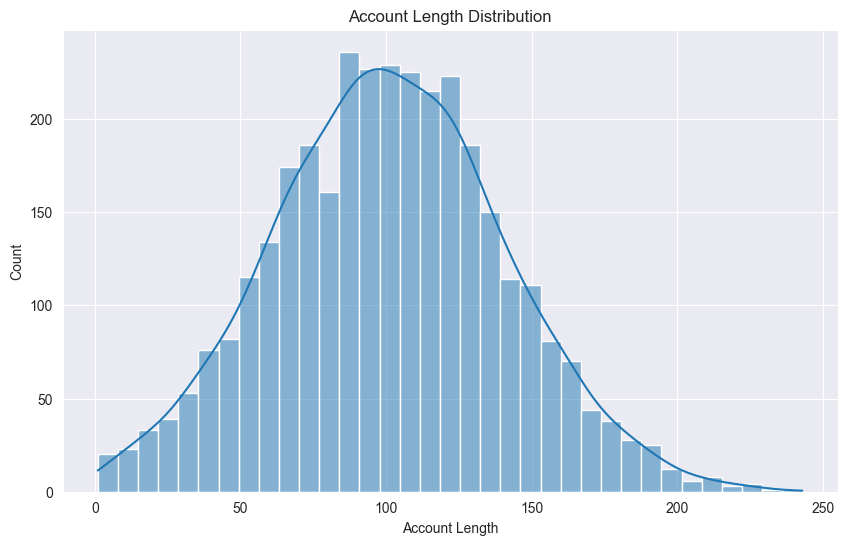

In [22]:
sns.histplot(data=df, x='account_length', kde=True)
plt.title("Account Length Distribution")
plt.xlabel("Account Length")
plt.savefig("./images/account_length_org.png")
# distribution of original account_length

> In this distribution of account length, we see another normal distribution, other than some account lengths going over 200. 

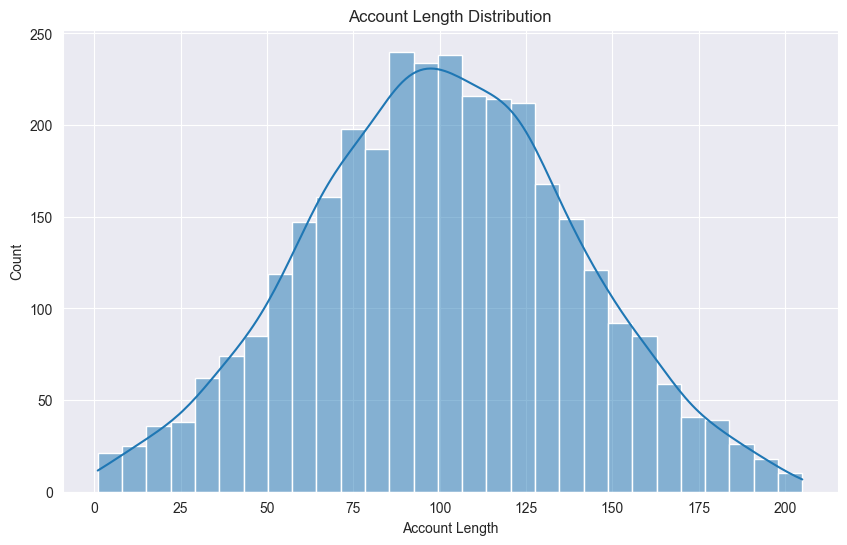

In [23]:
temp = remove_outliers(df, 'account_length')
sns.histplot(data=temp, x='account_length', kde=True)
plt.title("Account Length Distribution")
plt.xlabel("Account Length")
plt.savefig("./images/account_length_out.png")
# distributoin of account length without outliers

> When those higher account lengths are removed, the distribution remains as a normal distribution

#### Customer Service Calls

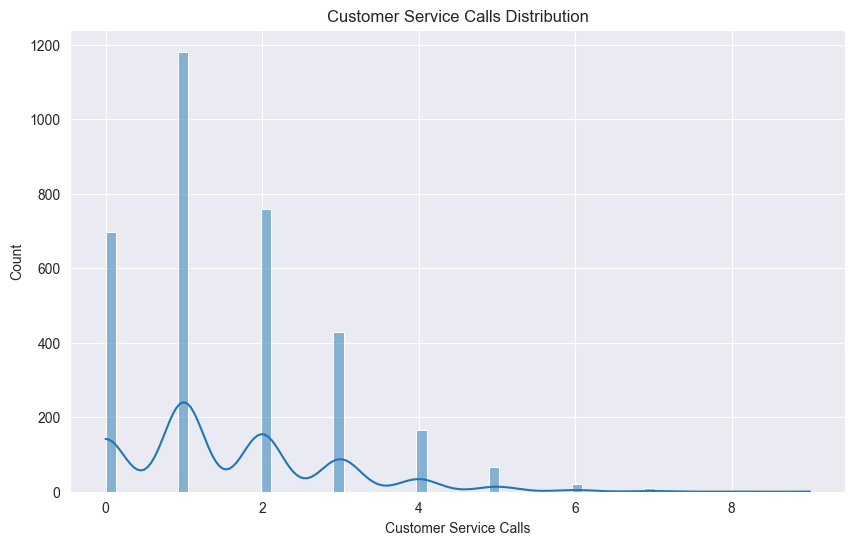

In [24]:
sns.histplot(data=df, x='custserv_calls', kde=True)
plt.title("Customer Service Calls Distribution")
plt.xlabel("Customer Service Calls")
plt.savefig("./images/custserv_calls_org.png")
# distribution of original customer serivce calls column 

> For the customer service calls, we see most customers call 3 or less times to customer service. 

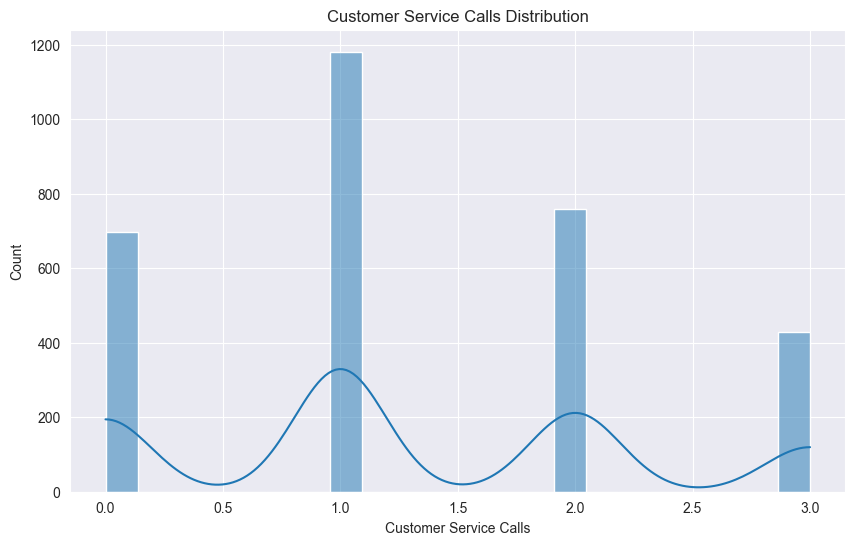

In [25]:
temp = remove_outliers(df, 'custserv_calls')
sns.histplot(data=temp, x='custserv_calls', kde=True)
plt.title("Customer Service Calls Distribution")
plt.xlabel("Customer Service Calls")
plt.savefig("./images/custserv_calls_out.png")
# distribution of  customer serivce calls column without outliers

> When we remove the outliers, the range is only from 0-3 calls, meaning that it would be considered abnormal for a customer to call more than 3 times. 

## Exploratory Data Analysis

For the EDA of this project, we will go back to the original data. 

#### Questions
1. How often is customer service called?
2. How are international calls related to the customer service calls?
3. When do the most calls happen? During the day, in the evening, or at night?
4. What time of day is the most expensive on average?
5. Is there a correlation between customer service calls and the churn rate?

##### How often is customer service called?

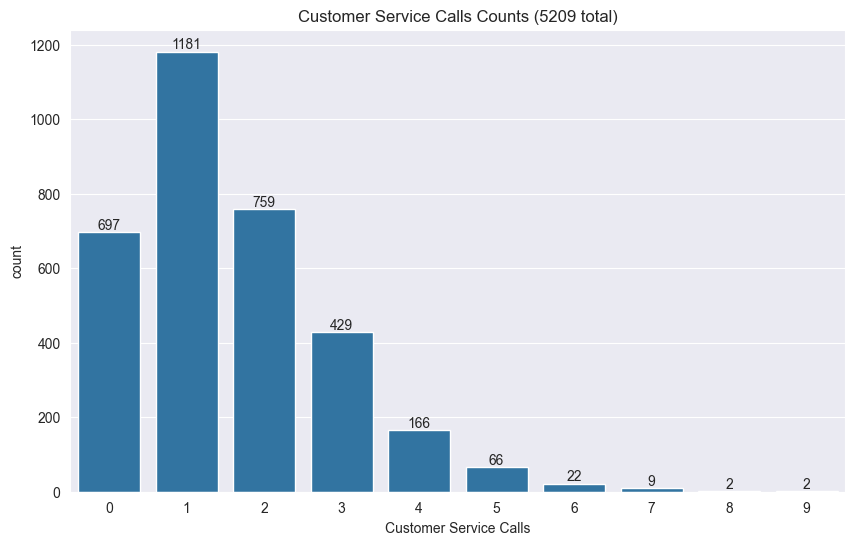

In [26]:
ax = sns.countplot(data=df, x='custserv_calls')
ax.bar_label(ax.containers[0]);
ax.set_title("Customer Service Calls Counts (5209 total)")
ax.set_xlabel("Customer Service Calls");
plt.savefig("./images/custserv_calls_counts.png")
# countplot of the customer service calls

> Seems like most customers call customer service 2 times or less. Some people tend to call a 3rd time, but having 4 or more calls seems to be rare, with only 8% of customer calling 4 times or more. 

##### How are international calls related to the customer service calls?

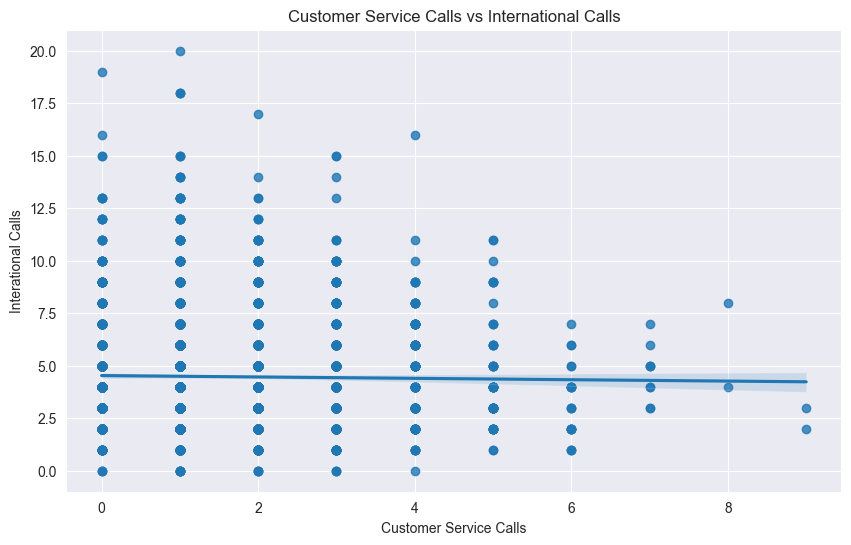

In [27]:
sns.regplot(data=df, x='custserv_calls', y='intl_calls')
plt.title("Customer Service Calls vs International Calls")
plt.xlabel("Customer Service Calls")
plt.ylabel("Interational Calls")
plt.savefig("./images/custserv_calls_intl.png")
# regression plot of teh customer service calls vs the internationalcalls 

In [28]:
np.corrcoef(df['custserv_calls'], df['intl_calls'])
# outputs the correlation coeffiecnt between customer service calls and international calls 

array([[ 1.       , -0.0175606],
       [-0.0175606,  1.       ]])

> In this regression plot, we see that the regression line is nearly straight, with a correlation coefficent of only -0.02.  There is essentially no correlation between customer service calls and international calls. 

##### When do the most calls happen? During the day, in the evening, or at night?

In [29]:
call_sums = {
    'day': df['day_calls'].sum(),
    'eve': df['eve_calls'].sum(),
    'night': df['night_calls'].sum()
}

call_sums = pd.DataFrame.from_dict(call_sums, orient='index', columns=['total_calls'])
call_sums
# gets teh sum of all calls for each time period

,total_calls
day,334752
eve,333681
night,333659


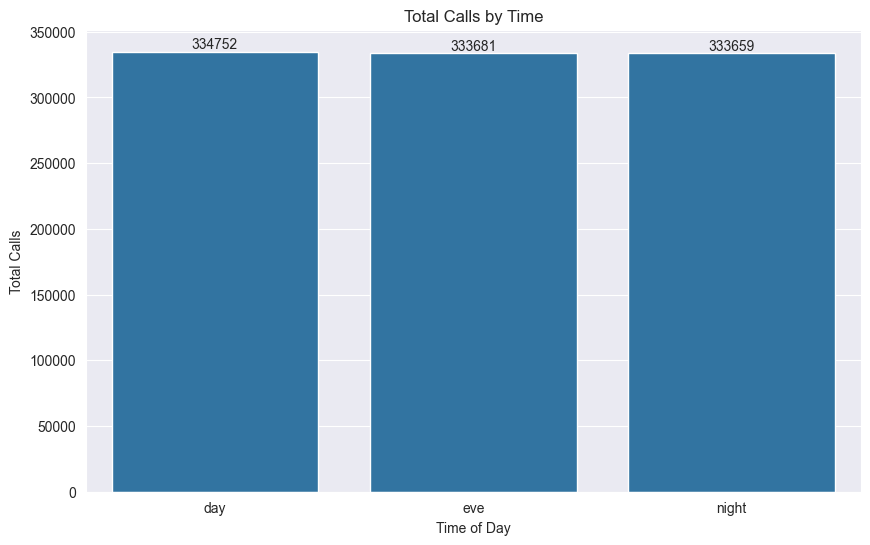

<Figure size 1000x600 with 0 Axes>

In [30]:
ax = sns.barplot(
    data=call_sums.reset_index(),
    x='index',
    y='total_calls'
)

for container in ax.containers:
    ax.bar_label(container)

plt.xlabel("Time of Day")
plt.ylabel("Total Calls")
plt.title("Total Calls by Time")
plt.show()
plt.savefig("./images/calls_by_time.png")

# plots the barplot of the sum of calls for each time period

> We can see that the different times of day all seem to have similar call sums, differing by less than 1000 calls. 

##### What time of day is the most expensive on average?

In [31]:
charge_avg = {
    'day': df['day_charge'].mean(),
    'eve': df['eve_charge'].mean(),
    'night': df['night_charge'].mean()
}

charge_avg = pd.DataFrame.from_dict(charge_avg, orient='index', columns=['avg_charge'])
charge_avg
# gets the average charge cost for each time period

,avg_charge
day,30.562307
eve,17.083540
night,9.039325


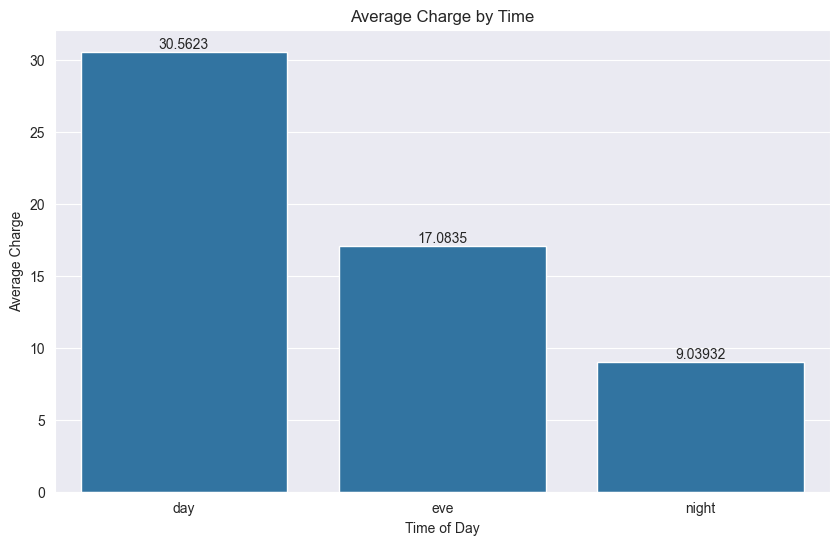

<Figure size 1000x600 with 0 Axes>

In [32]:
ax = sns.barplot(
    data=charge_avg.reset_index(),
    x='index',
    y='avg_charge'
)

for container in ax.containers:
    ax.bar_label(container)

plt.xlabel("Time of Day")
plt.ylabel("Average Charge")
plt.title("Average Charge by Time")
plt.show()
plt.savefig("./images/charges_by_time.png")
# plots a barplot of the average charge by time

> We can see in this plot that, on average, day time calls cost more than evening and night time calls. 

##### Is there a correlation between customer service calls and the churn rate?

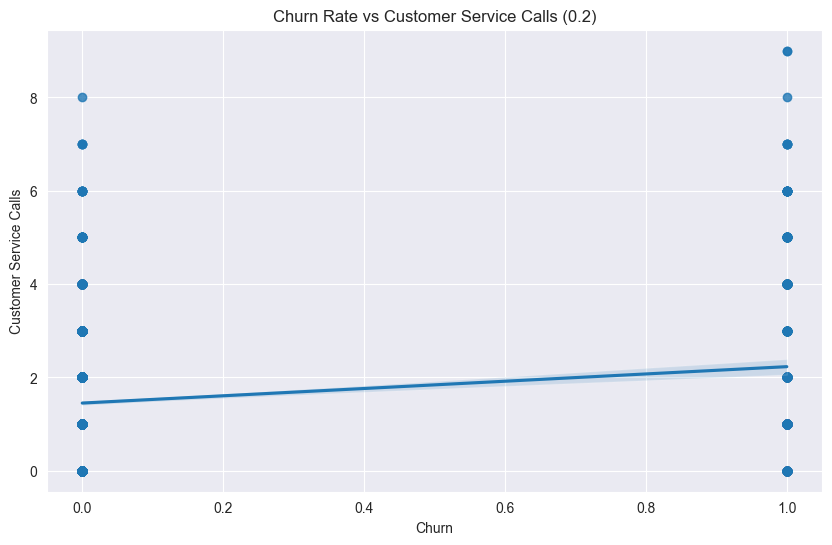

In [33]:
sns.regplot(data=df, x='churn', y='custserv_calls')
plt.title("Churn Rate vs Customer Service Calls (0.2)")
plt.xlabel("Churn")
plt.ylabel("Customer Service Calls")
plt.savefig("./images/custserv_calls_churn.png")
# plots a regression plot bvetween churn and customer service calls.

In [34]:
np.corrcoef(df['churn'], df['custserv_calls'])
# calculates the correlation coefficent between customer service calls and churn 

array([[1.     , 0.20875],
       [0.20875, 1.     ]])

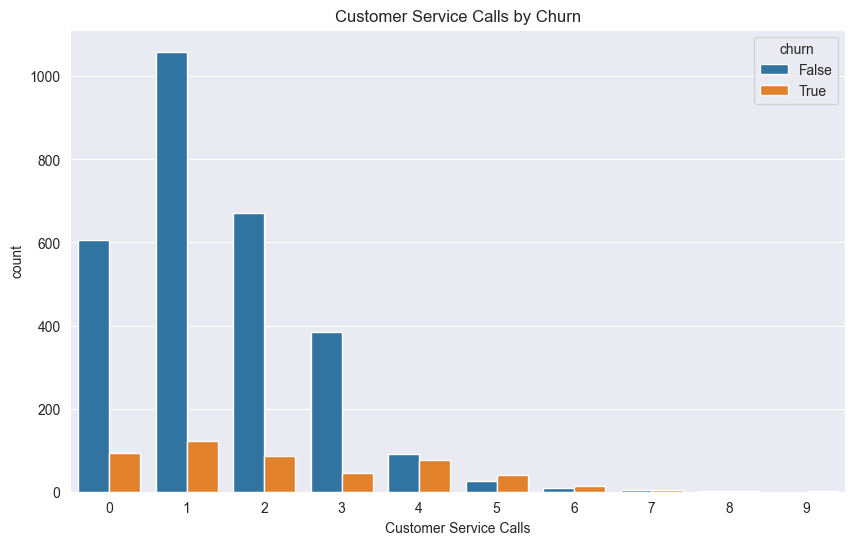

In [35]:
sns.countplot(data=df, x='custserv_calls', hue='churn')
plt.title("Customer Service Calls by Churn")
plt.xlabel("Customer Service Calls")
plt.savefig("./images/custserv_calls_count_churn.png")
# makes a countplot of customer service calls, by churn rate. 

> We can see with both the regression plot and the countplot, the number of customer service calls does not seem to have too much of an affect on churn rate. The correlation coefficent is only 0.2, which would be a weak correlation. And we can see that at different customer service calls numbers, there are customers that did churn, and ones that did not, so it does not seem to have too much of an affect. 